In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("/content/loan_approval.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.shape

(4269, 13)

In [5]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
df_numerical = df.select_dtypes(include=['number'])
df_numerical=df_numerical.drop(columns='loan_id')

In [8]:
df_numerical.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [9]:
df_numerical.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


### Data Preprocessing

In [10]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [11]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [12]:
df[' education'].value_counts()

,count
education,
Graduate,2144
Not Graduate,2125


In [13]:
df[' self_employed'].value_counts()

,count
self_employed,
Yes,2150
No,2119


In [14]:
df[' loan_status'].value_counts()

,count
loan_status,
Approved,2656
Rejected,1613


In [15]:
from sklearn.preprocessing import LabelEncoder

LE= LabelEncoder()
df[' education'] = LE.fit_transform(df[' education'])
df[' self_employed'] = LE.fit_transform(df[' self_employed'])


In [16]:
df[' loan_status'] = np.where(df[' loan_status'] == ' Approved', 1, 0)

In [17]:
df[df < 0].count().sum()  # Total count of negative values in the DataFrame

np.int64(28)

# **EDA**

In [18]:
df.describe()  # Summary statistics for numerical features
df.info()     # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   loan_id                    4269 non-null   int64
 1    no_of_dependents          4269 non-null   int64
 2    education                 4269 non-null   int64
 3    self_employed             4269 non-null   int64
 4    income_annum              4269 non-null   int64
 5    loan_amount               4269 non-null   int64
 6    loan_term                 4269 non-null   int64
 7    cibil_score               4269 non-null   int64
 8    residential_assets_value  4269 non-null   int64
 9    commercial_assets_value   4269 non-null   int64
 10   luxury_assets_value       4269 non-null   int64
 11   bank_asset_value          4269 non-null   int64
 12   loan_status               4269 non-null   int64
dtypes: int64(13)
memory usage: 433.7 KB


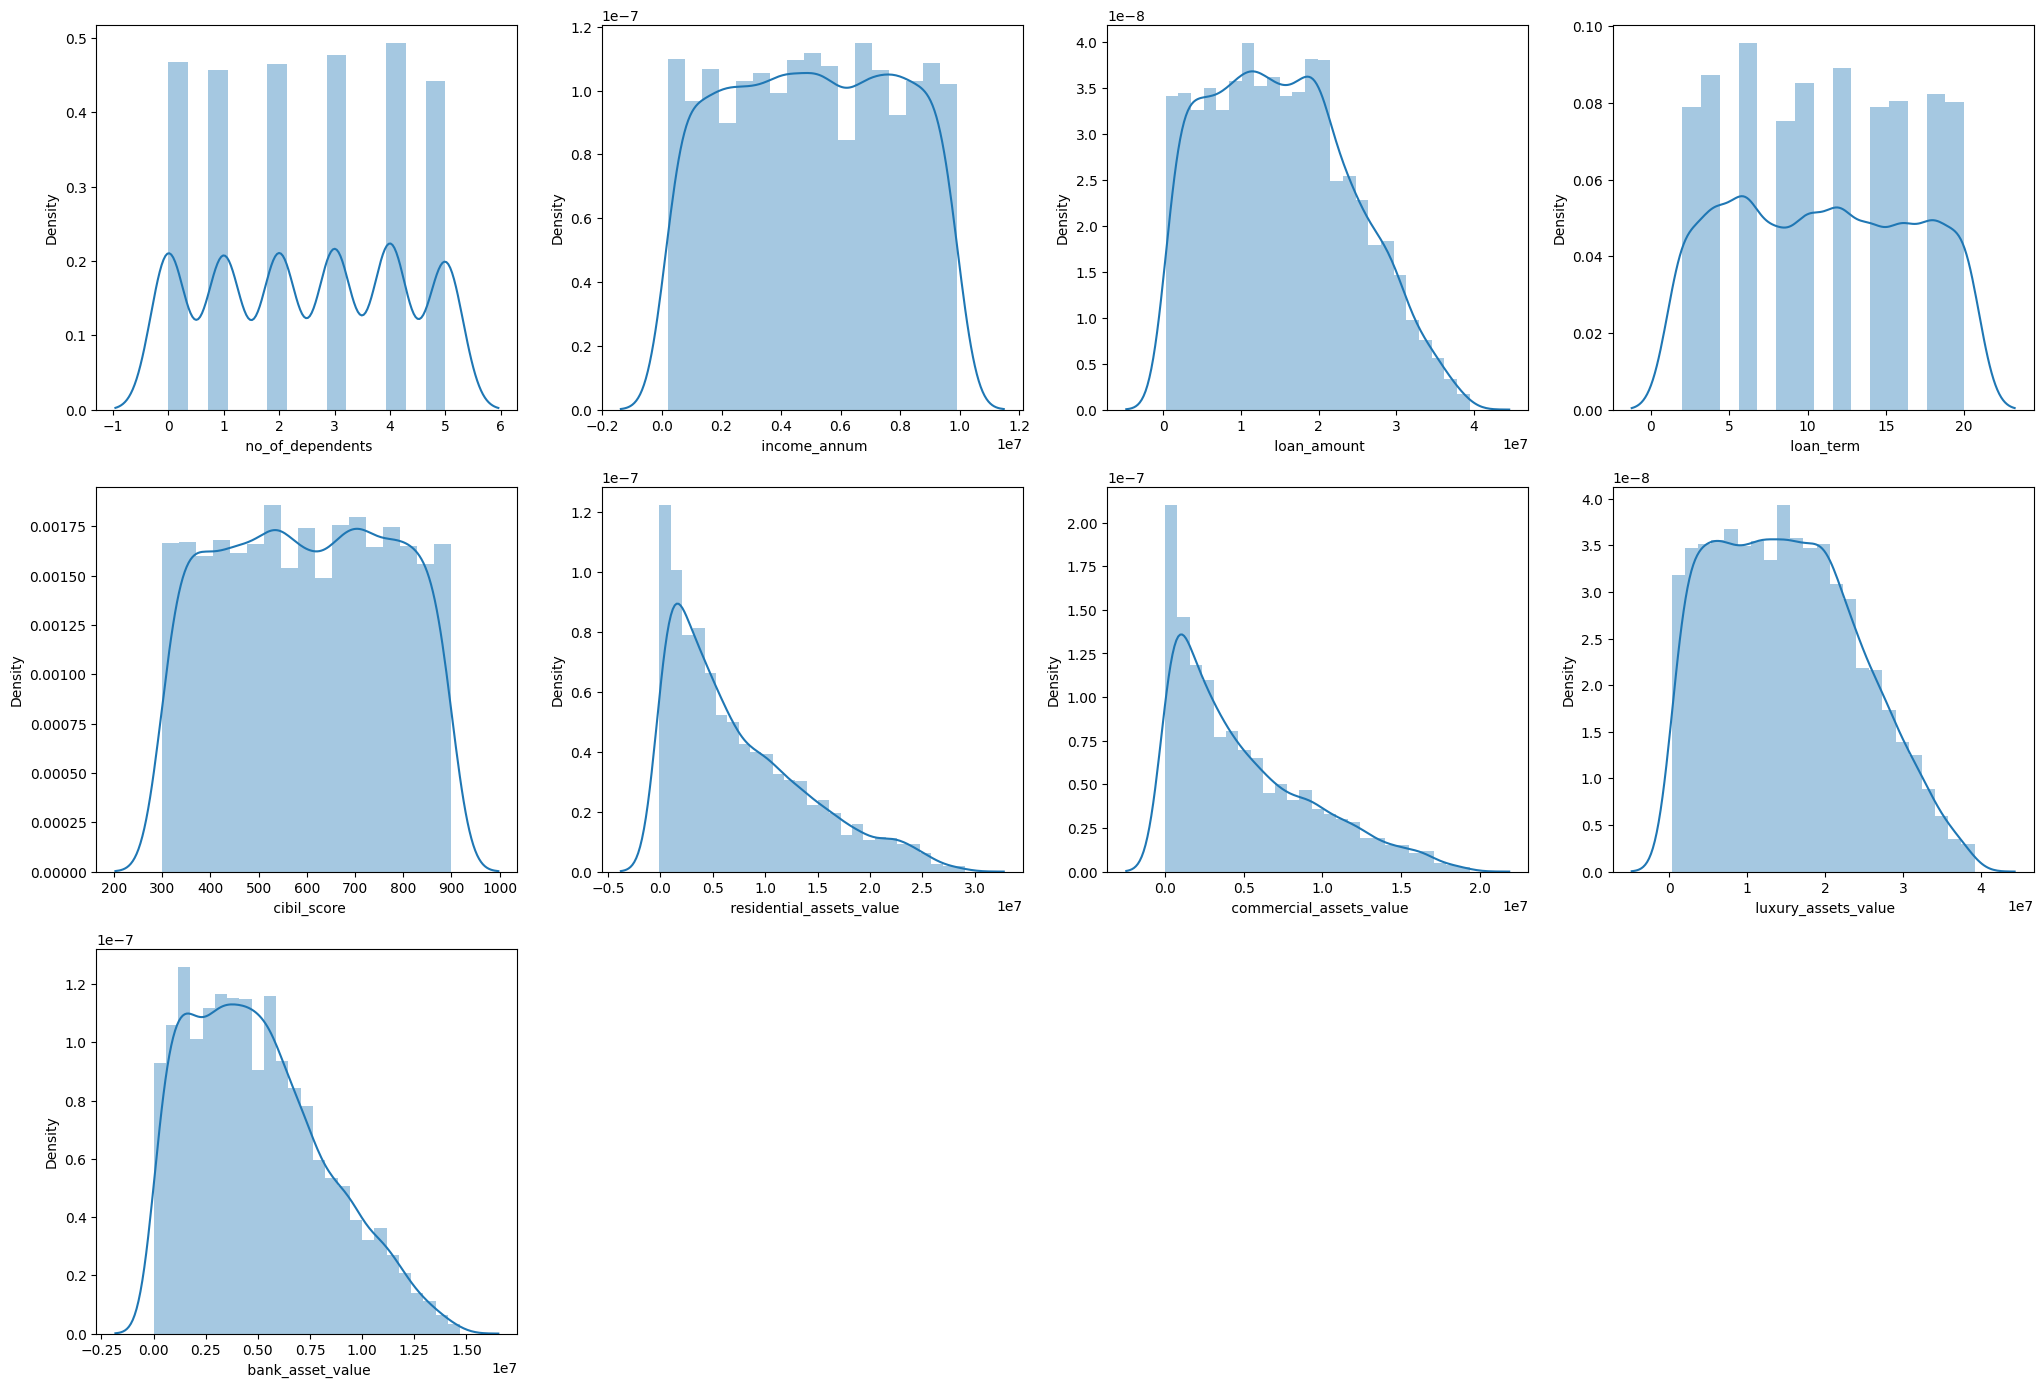

In [19]:
plt.figure(figsize=(25,35))
plotnumber=1

for col in df_numerical:
    if plotnumber<=15:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df_numerical[col])
        plt.xlabel(col, fontsize=10)
    plotnumber+=1
plt.show()

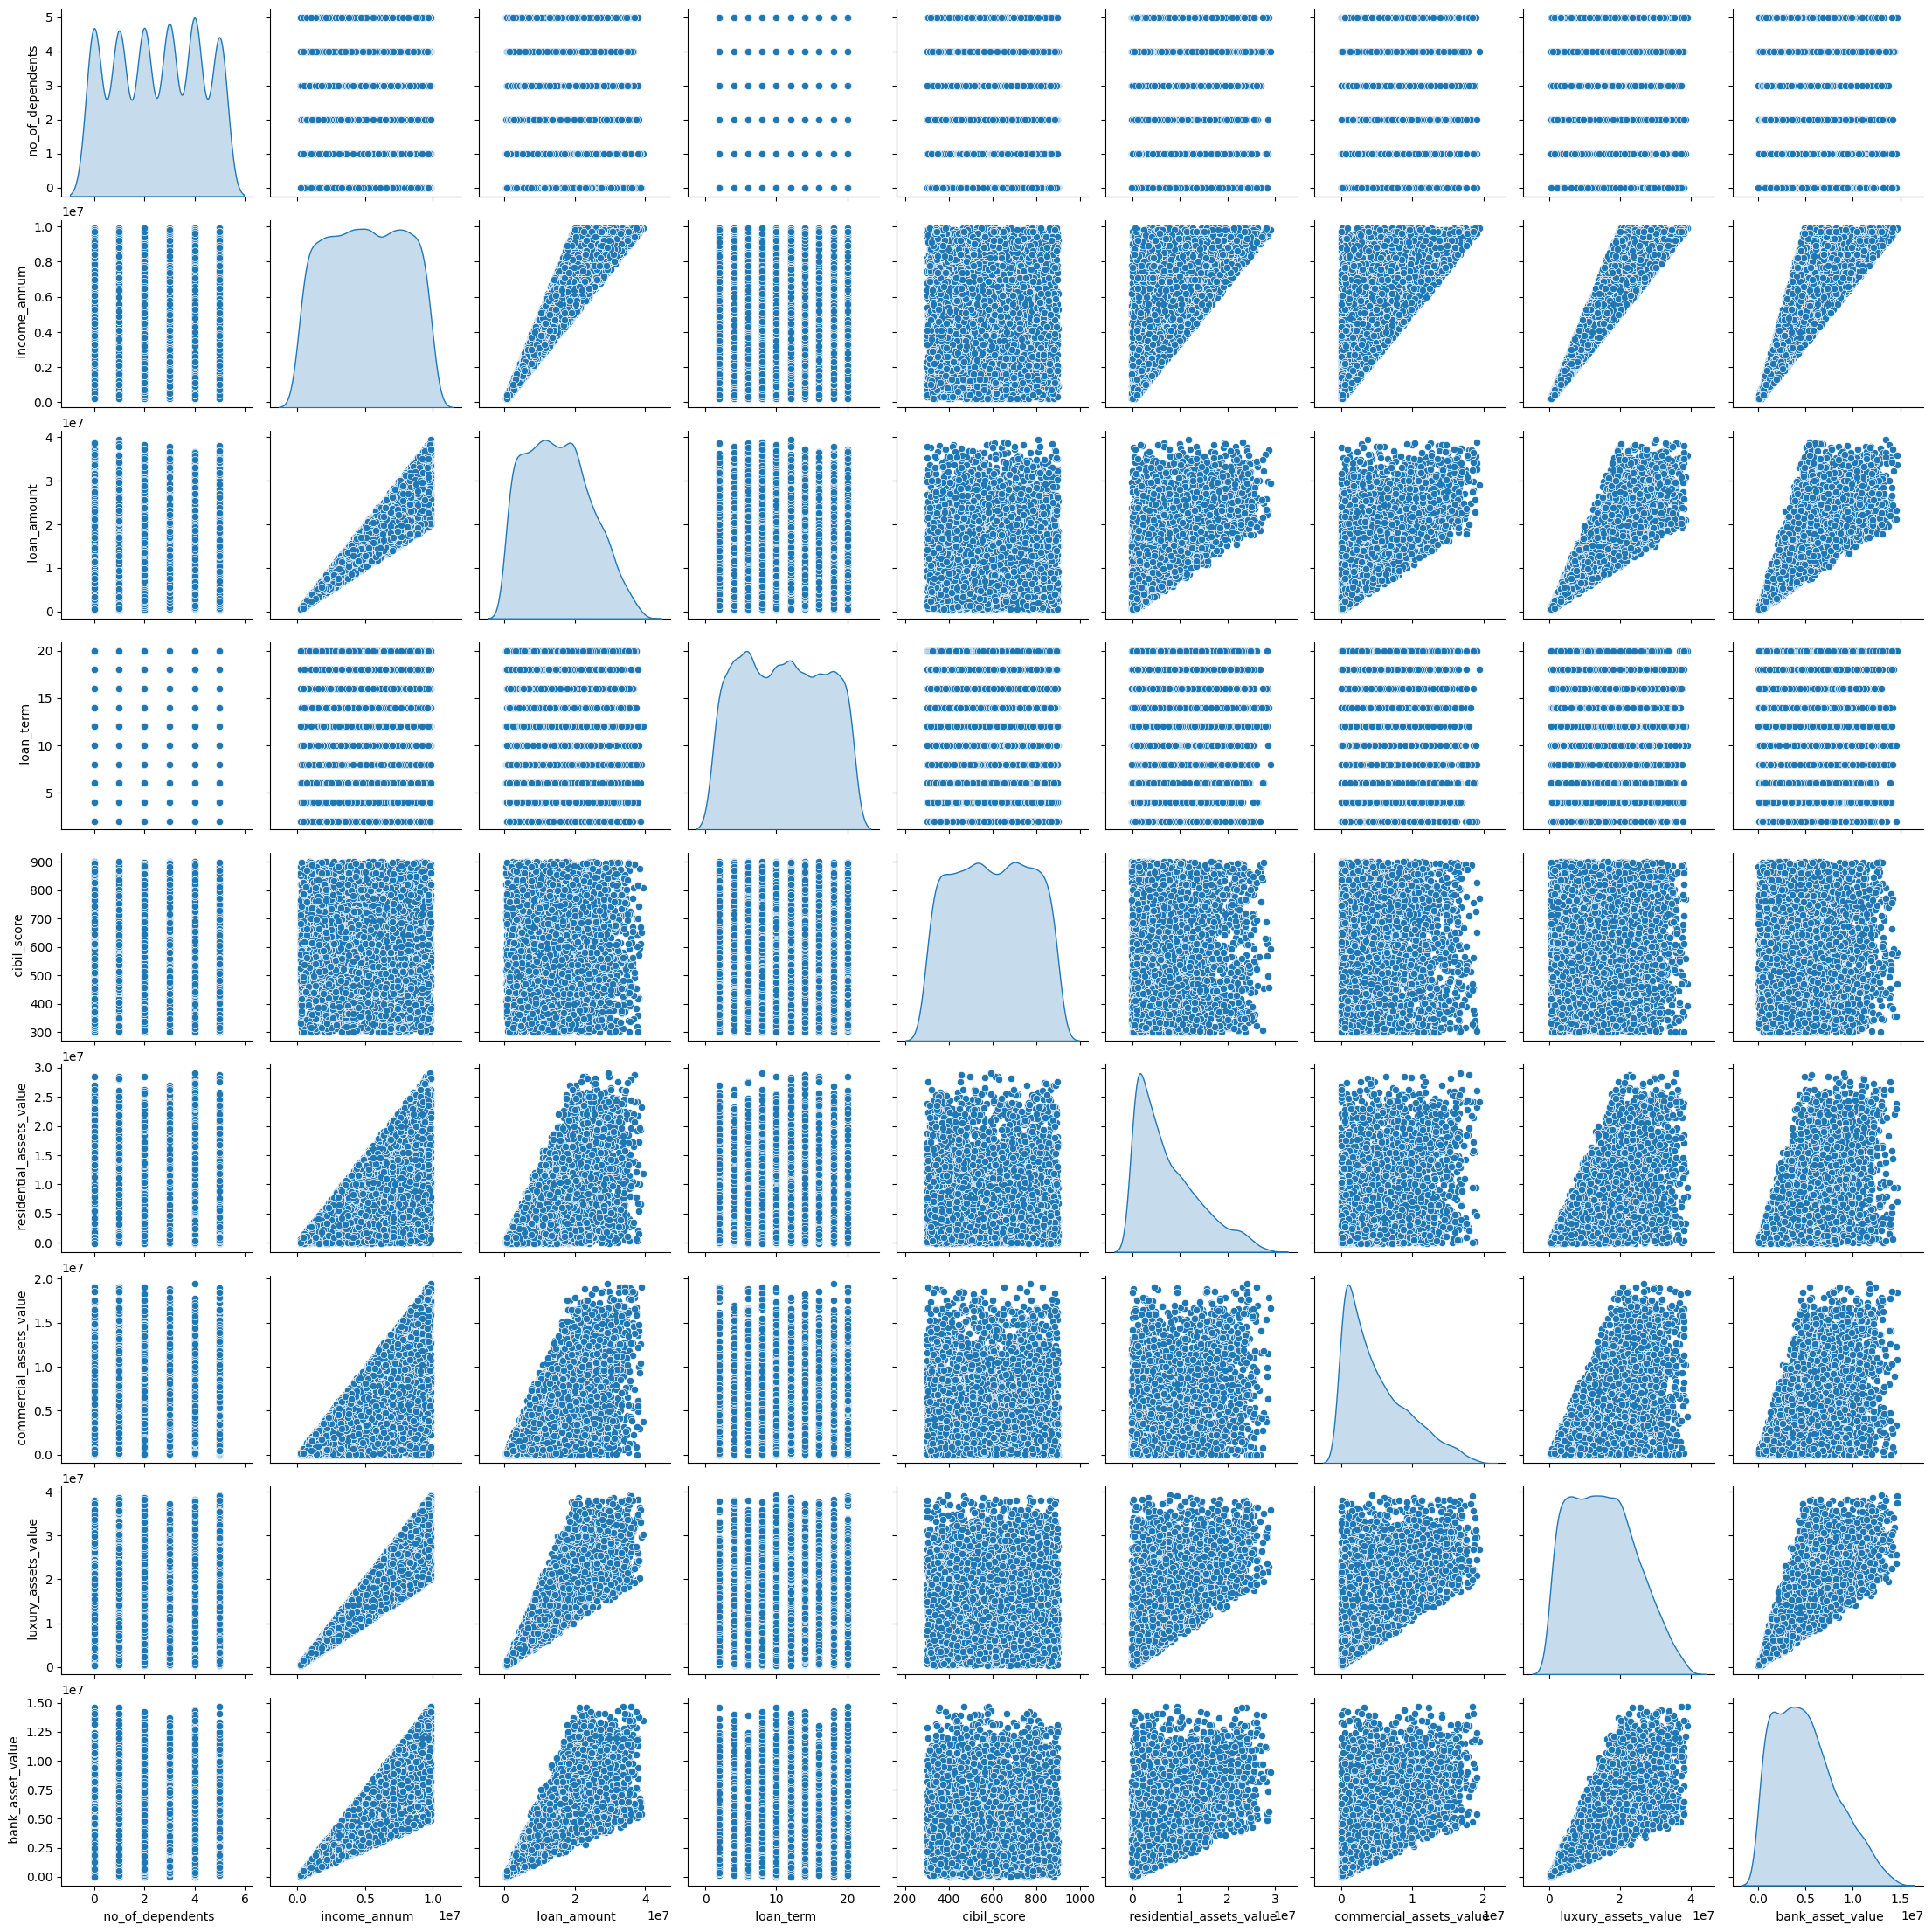

In [30]:
# prompt: Pairplot of other style and colour

import matplotlib.pyplot as plt
sns.pairplot(df_numerical, diag_kind='kde', palette="pastel")
plt.show()


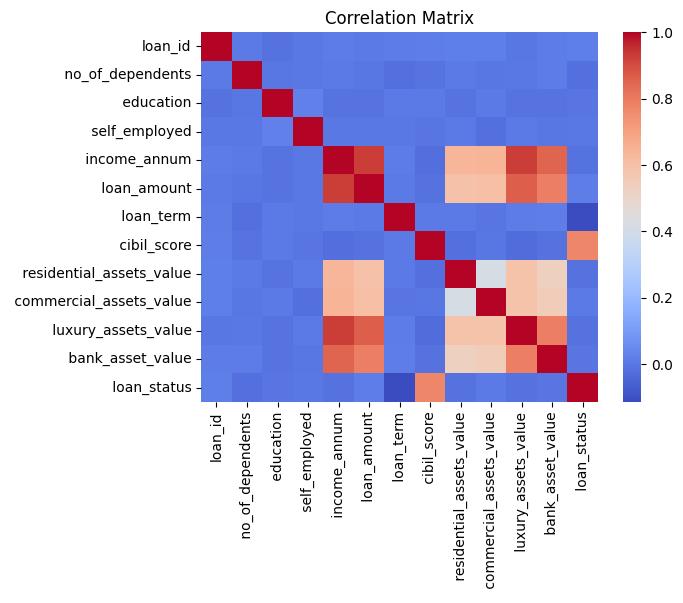

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Create the heatmap without annotations
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

Outlier Detection and Treatment

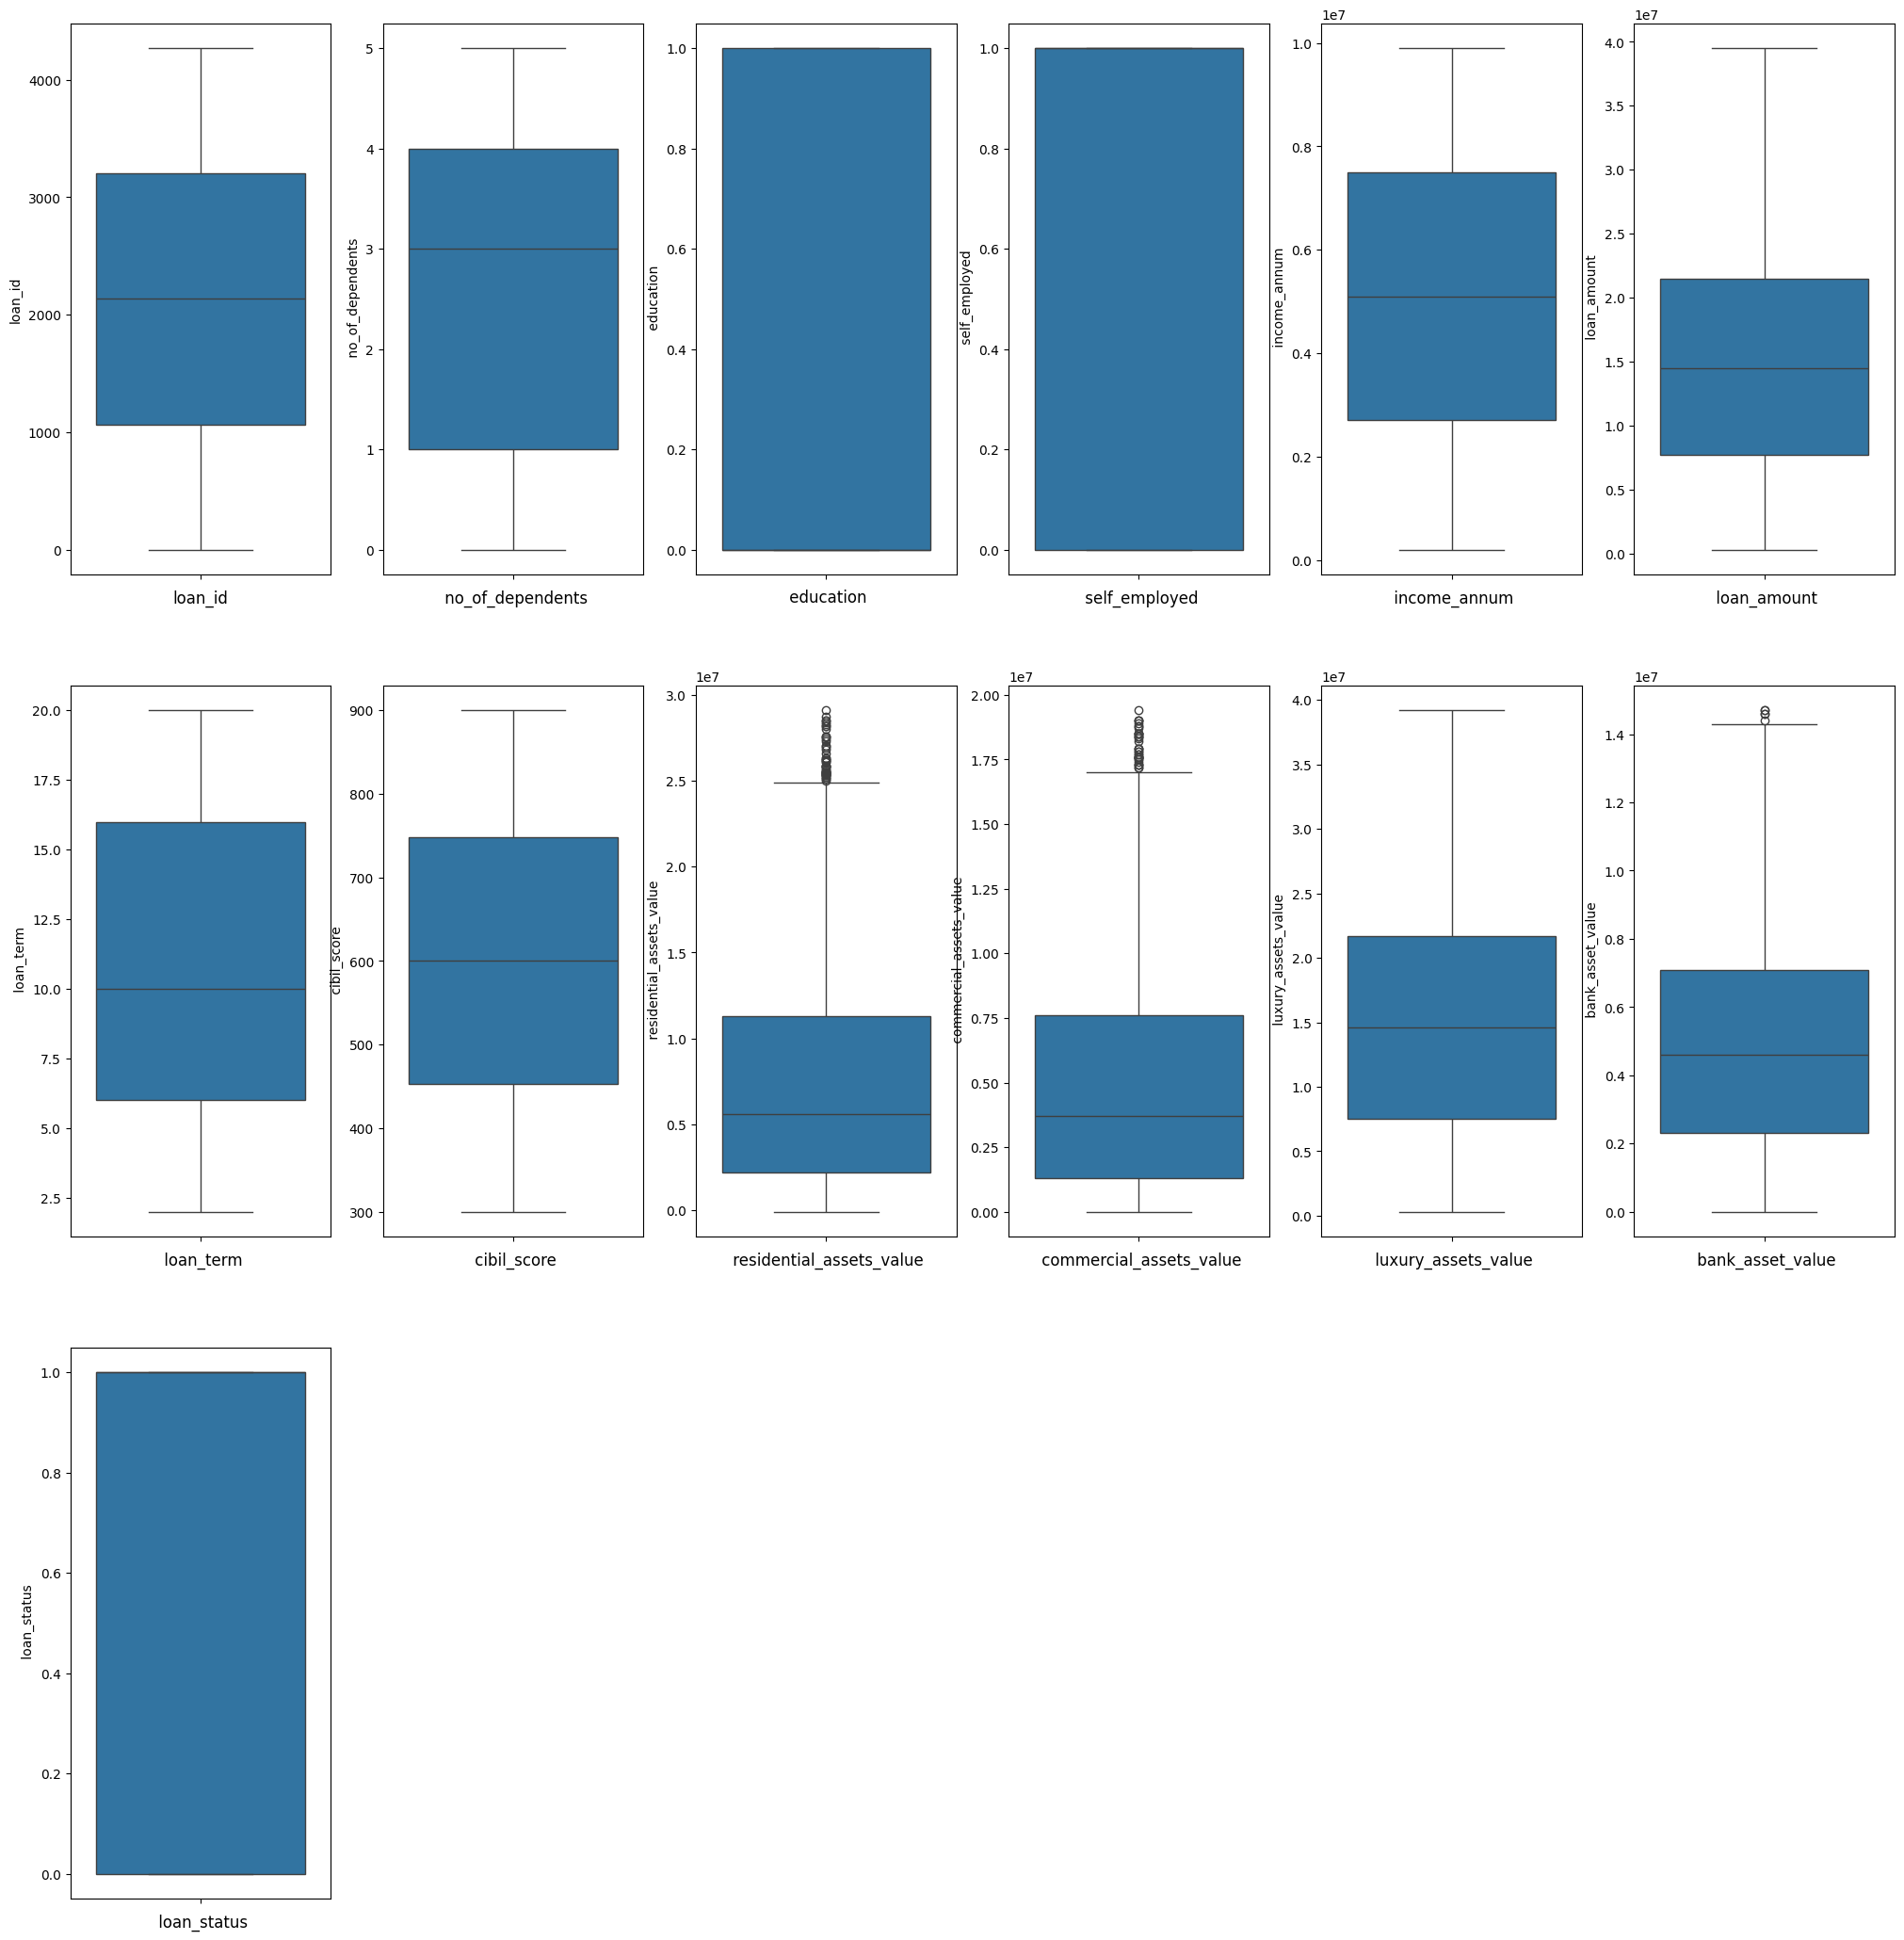

In [21]:
plt.figure(figsize=(25,35))
graph=1

for col in df:
    if graph<=24:
        ax=plt.subplot(4,6,graph)
        sns.boxplot(data=df[col],orient="v")
        plt.xlabel(col, fontsize=12)
    graph+=1

plt.show()

In [ ]:
import pandas as pd

def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Apply to numerical features and print the count
for column in df_numerical.columns:
    outlier_count = count_outliers_iqr(df, column)
    print(f"Number of outliers in {column}: {outlier_count}")

Number of outliers in  no_of_dependents: 0
Number of outliers in  income_annum: 0
Number of outliers in  loan_amount: 0
Number of outliers in  loan_term: 0
Number of outliers in  cibil_score: 0
Number of outliers in  residential_assets_value: 52
Number of outliers in  commercial_assets_value: 37
Number of outliers in  luxury_assets_value: 0
Number of outliers in  bank_asset_value: 5


In [ ]:
import numpy as np

def cap_outliers(df, column, lower_percentile=1, upper_percentile=99):
    lower_bound = df[column].quantile(lower_percentile / 100)
    upper_bound = df[column].quantile(upper_percentile / 100)

    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply to numerical features
for column in df_numerical.columns:
    df = cap_outliers(df, column)

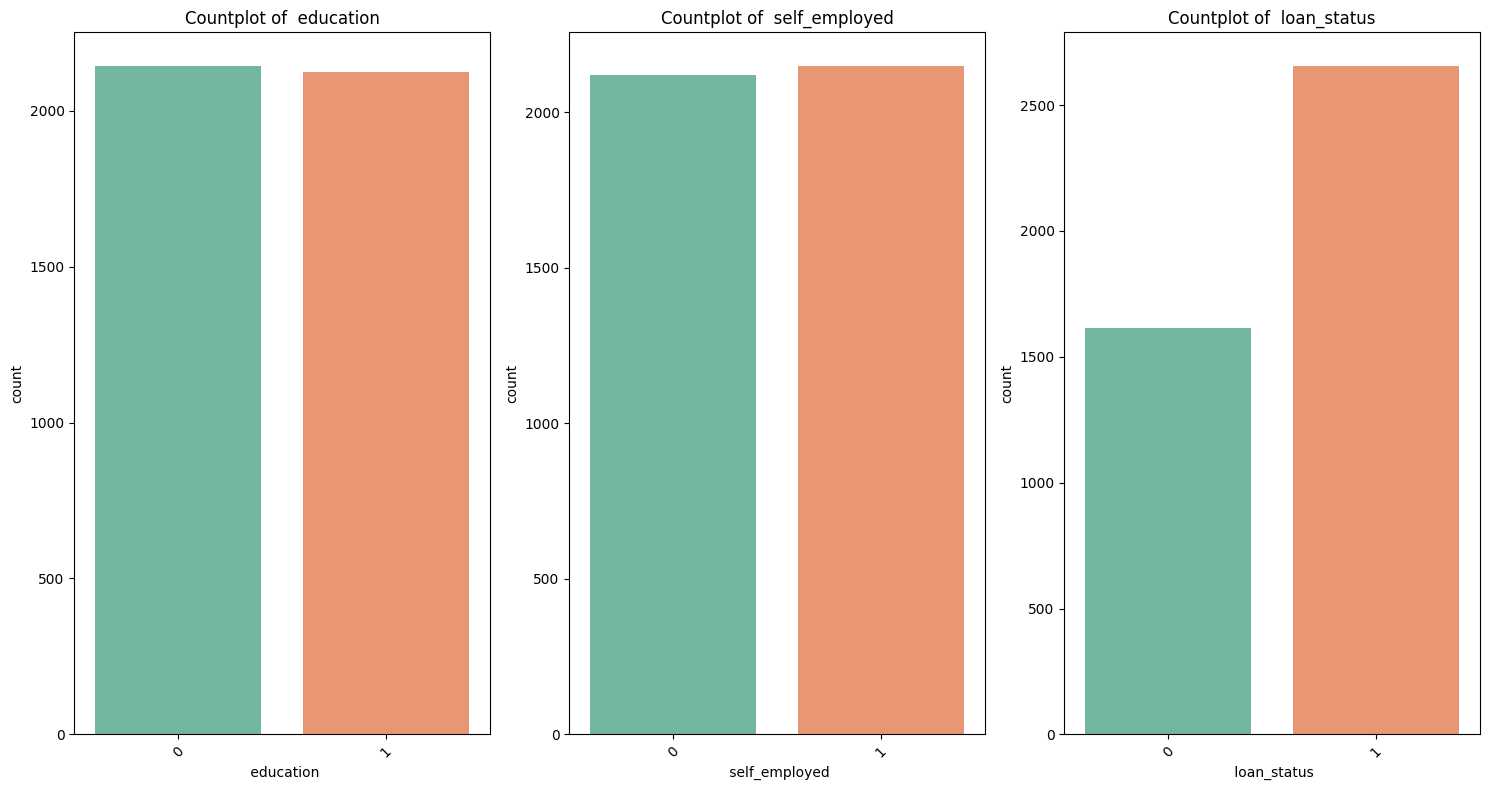

In [31]:
# prompt: count plot for categorical features with different colours and all in one frame

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains categorical columns like 'education', 'self_employed', etc.

plt.figure(figsize=(15, 8))  # Adjust figure size as needed

categorical_cols = [' education', ' self_employed', ' loan_status'] #add other categorical columns

for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i + 1)  # Create subplots for each categorical feature
    sns.countplot(x=col, data=df, palette='Set2')  # Use a color palette like 'Set2', 'husl', etc.
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability

plt.tight_layout() # Adjust layout for better spacing
plt.show()


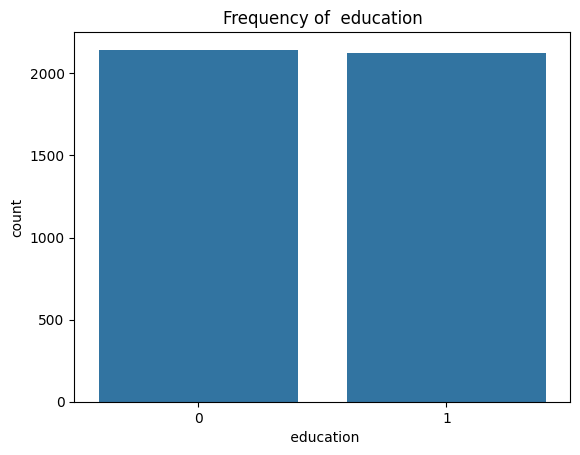

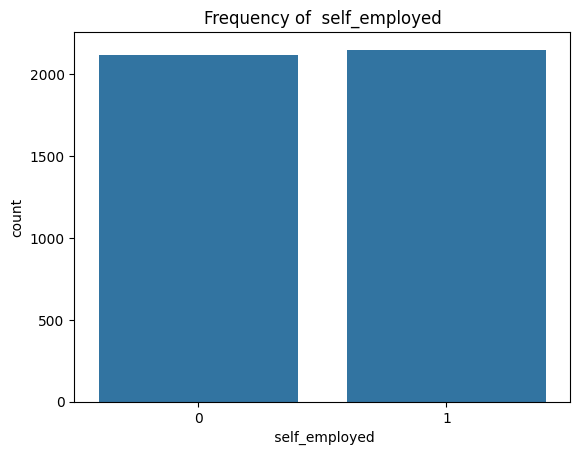

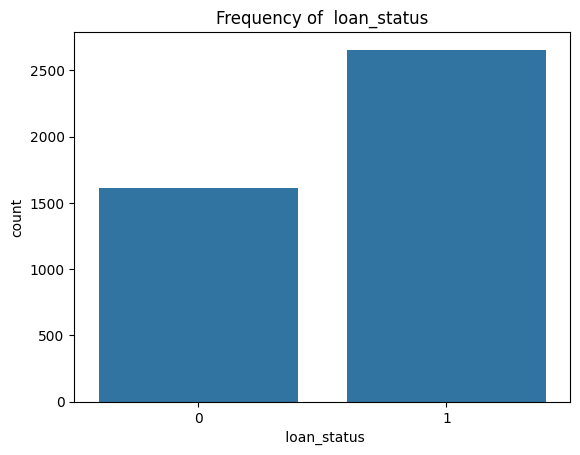

In [ ]:
# Bar plots for categorical features
for col in [' education', ' self_employed', ' loan_status']:
    sns.countplot(x=col, data=df)
    plt.title(f'Frequency of {col}')
    plt.show()

In [32]:
# Assuming an average interest rate (e.g., 10%) and loan term (e.g., 360 months) - adjust these values if necessary
interest_rate = 0.10

df['emi'] = (df[' loan_amount'] * interest_rate / 12) / (1 - (1 + interest_rate / 12)**(-df[' loan_term']*12))

In [33]:
df['emi'] = df['emi'].round()  # Rounds to the nearest whole number

In [34]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,emi
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,357328.0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,185125.0
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,286611.0
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,465847.0
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,233535.0


In [35]:
df[' loan_status'].value_counts()

,count
loan_status,
1,2656
0,1613


<Axes: >

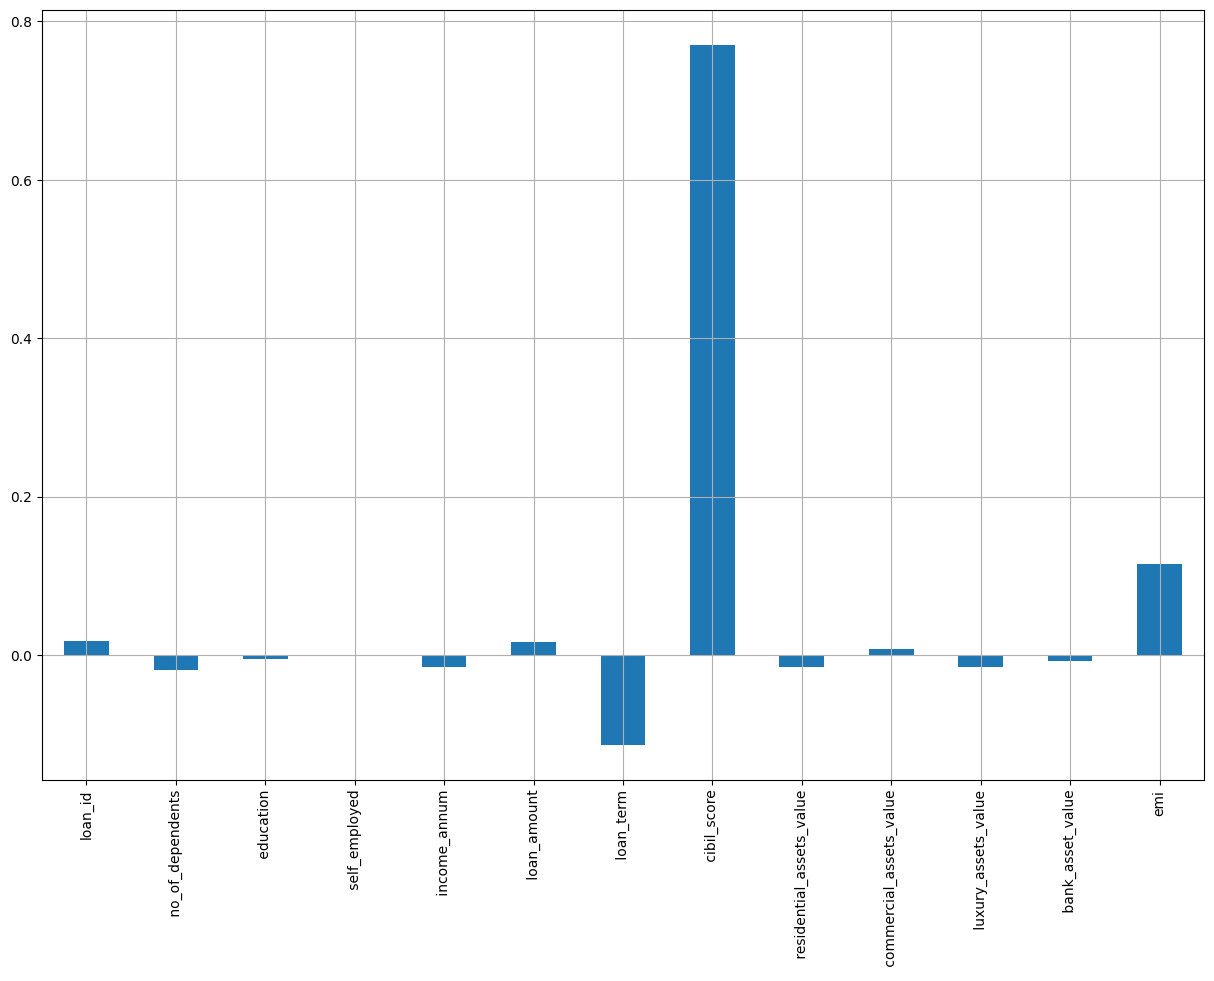

In [36]:
#Visualize the correlation
df.drop(' loan_status', axis=1).corrwith(df[' loan_status']).plot(kind='bar', grid=True, figsize=(15,10))

In [37]:
# Calculate correlation with the target variable
correlation = df.drop(' loan_status', axis=1).corrwith(df[' loan_status'])
correlation

,0
loan_id,0.017685
no_of_dependents,-0.018114
education,-0.004918
self_employed,0.000345
income_annum,-0.015189
loan_amount,0.016150
loan_term,-0.113036
cibil_score,0.770518
residential_assets_value,-0.014367
commercial_assets_value,0.008246


In [38]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status', 'emi'],
      dtype='object')

In [39]:
X=df.drop(['loan_id',' loan_status'],axis=1)
y=df[' loan_status']

# Normalization and Standardization

In [40]:
# prompt: Yeo Johnson transformation and Standard Scaler

import pandas as pd
from sklearn.preprocessing import PowerTransformer, StandardScaler

# Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed, columns = X.columns)

# StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)
X = pd.DataFrame(X_scaled, columns = X_transformed.columns)


# **VIF**

# **Model Training**

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [43]:
from sklearn.model_selection import train_test_split

# X, y already preprocessed and scaled
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [44]:
#Applying SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE: ", y_train_res.value_counts())


Before SMOTE:  loan_status
1    2125
0    1290
Name: count, dtype: int64
After SMOTE:   loan_status
1    2125
0    2125
Name: count, dtype: int64


In [45]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_res, y_train_res)

y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.89      0.94      0.92       323
           1       0.96      0.93      0.95       531

    accuracy                           0.93       854
   macro avg       0.93      0.94      0.93       854
weighted avg       0.94      0.93      0.93       854

ROC-AUC: 0.9772087247030837


In [48]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Prepare the 5-fold splitter
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []
roc_auc_scores = []

# Loop over each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_res, y_train_res), 1):
    X_tr, X_val = X_train_res.iloc[train_idx], X_train_res.iloc[val_idx]
    y_tr, y_val = y_train_res.iloc[train_idx], y_train_res.iloc[val_idx]

    # Train Logistic Regression
    model = LogisticRegression(random_state=42)
    model.fit(X_tr, y_tr)

    # Predict and evaluate
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]
    f1 = f1_score(y_val, y_pred)
    roc = roc_auc_score(y_val, y_proba)

    f1_scores.append(f1)
    roc_auc_scores.append(roc)
    print(f"Fold {fold}: F1 = {f1:.3f}, ROC-AUC = {roc:.3f}")

# Average performance
print(f"\nAverage F1 Score: {np.mean(f1_scores):.3f}")
print(f"Average ROC-AUC:    {np.mean(roc_auc_scores):.3f}")


Fold 1: F1 = 0.931, ROC-AUC = 0.972
Fold 2: F1 = 0.935, ROC-AUC = 0.971
Fold 3: F1 = 0.920, ROC-AUC = 0.967
Fold 4: F1 = 0.937, ROC-AUC = 0.983
Fold 5: F1 = 0.915, ROC-AUC = 0.959

Average F1 Score: 0.928
Average ROC-AUC:    0.970


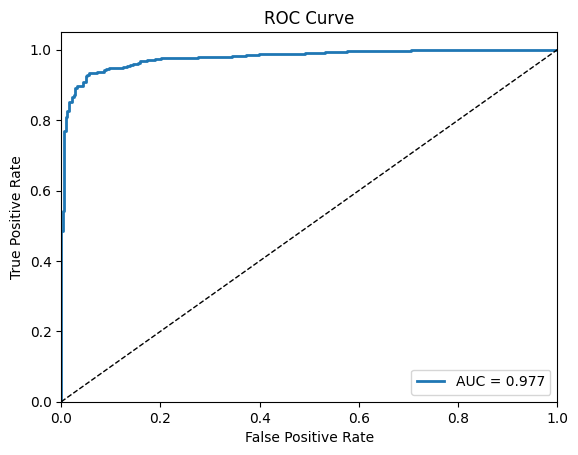

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'model' is your trained LogisticRegression (or any classifier)
# and X_test, y_test are your hold-out test sets.

# 1. Get predicted probabilities for the positive class
y_proba = model.predict_proba(X_test)[:, 1]

# 2. Compute false positive rate, true positive rate, and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# 3. Plot the ROC curve (AUC)
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--', lw=1)  # diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# **Random Forest**

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, f1_score
import numpy as np
import matplotlib.pyplot as plt


In [54]:
# Set up K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest model with class weights (for balancing)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)


In [55]:
# Store performance metrics
f1_scores = []
roc_auc_scores = []

# Loop through each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), 1):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train the Random Forest model
    rf.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    y_pred = rf.predict(X_val_fold)
    y_proba = rf.predict_proba(X_val_fold)[:, 1]  # Get probabilities for ROC-AUC

    # Calculate F1 and ROC-AUC
    f1 = f1_score(y_val_fold, y_pred)
    roc_auc = roc_auc_score(y_val_fold, y_proba)

    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

    # Print classification report for each fold
    print(f"Fold {fold}: F1 = {f1:.3f}, ROC-AUC = {roc_auc:.3f}")

# Average performance across all folds
print("\nAverage F1 Score:", np.mean(f1_scores))
print("Average ROC-AUC:", np.mean(roc_auc_scores))


Fold 1: F1 = 0.988, ROC-AUC = 0.991
Fold 2: F1 = 0.980, ROC-AUC = 0.999
Fold 3: F1 = 0.984, ROC-AUC = 0.999
Fold 4: F1 = 0.986, ROC-AUC = 0.995
Fold 5: F1 = 0.984, ROC-AUC = 0.997

Average F1 Score: 0.9843272944887739
Average ROC-AUC: 0.9962571819425445


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# 1. Define a small, focused parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],            # number of trees
    'max_depth': [None, 10, 20],                # tree depth
    'min_samples_split': [2, 5],                # min samples to split
    'min_samples_leaf': [1, 2],                 # min samples in leaf
    'max_features': ['sqrt', 'log2']            # num features per split
}

# 2. Set up the RandomizedSearchCV
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rnd_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,               # only 10 combos → fast
    cv=3,                    # 3-fold CV
    scoring='roc_auc',       # optimize on ROC-AUC
    random_state=42,
    n_jobs=-1,               # parallelize
    verbose=1
)

# 3. Fit on your training data
rnd_search.fit(X_train, y_train)

# 4. Best parameters & score
print("Best params:", rnd_search.best_params_)
print("Best ROC-AUC:", rnd_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best ROC-AUC: 0.9959080101258929


In [60]:
print("Accuracy:", rnd_search.best_score_)

Accuracy: 0.9959080101258929


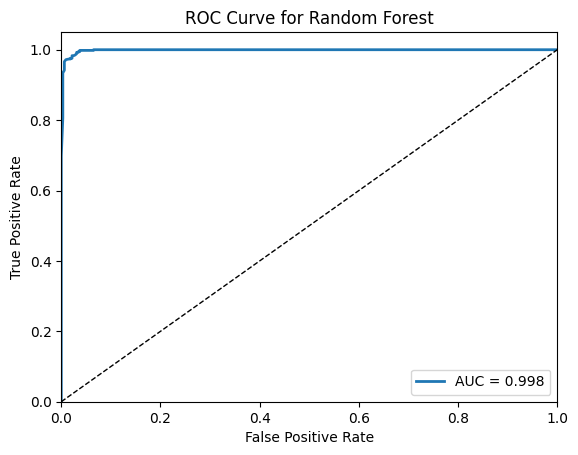

In [61]:
# prompt: AUC curve for Random forest

import matplotlib.pyplot as plt
# Assuming 'rnd_search' is your trained RandomizedSearchCV object from the previous code.
# and X_test, y_test are your hold-out test sets.

# 1. Get the best model from the RandomizedSearchCV
best_rf_model = rnd_search.best_estimator_

# 2. Predict probabilities for the positive class using the best model
y_proba = best_rf_model.predict_proba(X_test)[:, 1]

# 3. Compute false positive rate, true positive rate, and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# 4. Plot the ROC curve (AUC)
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--', lw=1)  # diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest') # Added specificity
plt.legend(loc='lower right')
plt.show()


# **Decision Tree**

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, f1_score
import numpy as np
import matplotlib.pyplot as plt


In [58]:
# Set up K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Decision Tree classifier with class weight balancing
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)


In [59]:
# Store performance metrics
f1_scores = []
roc_auc_scores = []

# Loop through each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), 1):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train the Decision Tree model
    dt.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    y_pred = dt.predict(X_val_fold)
    y_proba = dt.predict_proba(X_val_fold)[:, 1]  # Get probabilities for ROC-AUC

    # Calculate F1 and ROC-AUC
    f1 = f1_score(y_val_fold, y_pred)
    roc_auc = roc_auc_score(y_val_fold, y_proba)

    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

    # Print classification report for each fold
    print(f"Fold {fold}: F1 = {f1:.3f}, ROC-AUC = {roc_auc:.3f}")

# Average performance across all folds
print("\nAverage F1 Score:", np.mean(f1_scores))
print("Average ROC-AUC:", np.mean(roc_auc_scores))


Fold 1: F1 = 0.986, ROC-AUC = 0.981
Fold 2: F1 = 0.974, ROC-AUC = 0.969
Fold 3: F1 = 0.972, ROC-AUC = 0.964
Fold 4: F1 = 0.980, ROC-AUC = 0.972
Fold 5: F1 = 0.977, ROC-AUC = 0.975

Average F1 Score: 0.9777685530846867
Average ROC-AUC: 0.9720948472412221
